# 基本设置

In [1]:
R.version

               _                           
platform       x86_64-w64-mingw32          
arch           x86_64                      
os             mingw32                     
system         x86_64, mingw32             
status                                     
major          3                           
minor          5.2                         
year           2018                        
month          12                          
day            20                          
svn rev        75870                       
language       R                           
version.string R version 3.5.2 (2018-12-20)
nickname       Eggshell Igloo              

In [2]:
# install.packages( "lavaan")
# install.packages( "OpenMx")
# install.packages( "semPlot")
# install.packages( "GGally")
# install.packages( "corrplot")
# install.packages("readxl")
library(lavaan)
library(semPlot)
library(OpenMx)
library(GGally)
library(corrplot) 
library(readxl)

This is lavaan 0.6-3
lavaan is BETA software! Please report any bugs.

Attaching package: 'OpenMx'

The following object is masked from 'package:lavaan':

    vech

Loading required package: ggplot2
corrplot 0.84 loaded


# 201901

## 导入数据

In [3]:
file_folder <- "D:/XH/Python_Project/notebook/new_proj/201901"
# getwd()
setwd(file_folder)

data <- read_excel('data_sel_1.xlsx')
head(data, n = 5) 

B2r7c1,B2r37c1,B2r31c1,B2r42c1,B1r1c1,B1r5c1,B1r33c1,B1r34c1,B1r35c1,B1r36c1,...,B1r38c1,B2r40c1,B2r8c1,B2r20c1,B1r29c1,B1r43c1,B1r44c1,B1r45c1,B2r46c1,B2r47c1
1,1,0,1,1,0,0,0,0,0,...,0,1,1,0,0,1,0,1,0,1
1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,1
1,1,1,1,1,0,1,1,0,1,...,0,0,0,0,1,1,1,0,1,1
0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


## 逐步回归 -- 探索结构

In [9]:
lm_1 <- lm(B2r37c1 ~ B1r1c1 + B1r5c1 + B1r33c1 + B1r34c1 + B1r35c1 + B1r36c1 + B2r21c1 + B2r13c1 + B1r16c1 + B1r23c1 + B1r25c1 + B1r38c1 + B2r40c1 + B2r8c1 + B2r20c1 + B1r29c1 + B1r43c1 + B1r44c1 + B1r45c1 + B2r46c1 + B2r47c1  
,data=data)
summary(lm_1)


Call:
lm(formula = B2r37c1 ~ B1r1c1 + B1r5c1 + B1r33c1 + B1r34c1 + 
    B1r35c1 + B1r36c1 + B2r21c1 + B2r13c1 + B1r16c1 + B1r23c1 + 
    B1r25c1 + B1r38c1 + B2r40c1 + B2r8c1 + B2r20c1 + B1r29c1 + 
    B1r43c1 + B1r44c1 + B1r45c1 + B2r46c1 + B2r47c1, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.00068 -0.08466 -0.00068  0.18608  0.94940 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.050603   0.025211   2.007 0.044942 *  
B1r1c1       0.077885   0.027160   2.868 0.004203 ** 
B1r5c1       0.048588   0.025565   1.901 0.057585 .  
B1r33c1      0.001703   0.026521   0.064 0.948798    
B1r34c1      0.017981   0.025121   0.716 0.474251    
B1r35c1     -0.003117   0.026417  -0.118 0.906095    
B1r36c1      0.040158   0.026723   1.503 0.133148    
B2r21c1      0.105560   0.026524   3.980 7.28e-05 ***
B2r13c1      0.084107   0.026587   3.163 0.001595 ** 
B1r16c1      0.008295   0.026127   0.317 0.750927    
B1r23c1      0.052478  

In [10]:
tstep_1 <- step(lm_1)
summary(tstep_1)

Start:  AIC=-2777.03
B2r37c1 ~ B1r1c1 + B1r5c1 + B1r33c1 + B1r34c1 + B1r35c1 + B1r36c1 + 
    B2r21c1 + B2r13c1 + B1r16c1 + B1r23c1 + B1r25c1 + B1r38c1 + 
    B2r40c1 + B2r8c1 + B2r20c1 + B1r29c1 + B1r43c1 + B1r44c1 + 
    B1r45c1 + B2r46c1 + B2r47c1

          Df Sum of Sq    RSS     AIC
- B1r33c1  1    0.0005 152.07 -2779.0
- B1r35c1  1    0.0016 152.07 -2779.0
- B1r16c1  1    0.0119 152.08 -2778.9
- B2r20c1  1    0.0191 152.09 -2778.9
- B1r25c1  1    0.0207 152.09 -2778.9
- B1r34c1  1    0.0605 152.13 -2778.5
- B1r29c1  1    0.2034 152.27 -2777.3
- B1r45c1  1    0.2211 152.29 -2777.1
<none>                 152.07 -2777.0
- B1r36c1  1    0.2666 152.33 -2776.7
- B2r46c1  1    0.3030 152.37 -2776.4
- B1r44c1  1    0.3556 152.42 -2776.0
- B1r5c1   1    0.4265 152.49 -2775.4
- B1r23c1  1    0.4865 152.55 -2774.8
- B1r38c1  1    0.8906 152.96 -2771.4
- B1r1c1   1    0.9709 153.04 -2770.7
- B2r8c1   1    0.9851 153.05 -2770.6
- B2r13c1  1    1.1816 153.25 -2768.9
- B2r40c1  1    1.2483 153


Call:
lm(formula = B2r37c1 ~ B1r1c1 + B1r5c1 + B1r36c1 + B2r21c1 + 
    B2r13c1 + B1r23c1 + B1r38c1 + B2r40c1 + B2r8c1 + B1r29c1 + 
    B1r43c1 + B1r44c1 + B1r45c1 + B2r46c1 + B2r47c1, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.99884 -0.08996  0.00116  0.18251  0.94857 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.05143    0.02483   2.071 0.038536 *  
B1r1c1       0.08041    0.02651   3.033 0.002468 ** 
B1r5c1       0.05215    0.02506   2.081 0.037643 *  
B1r36c1      0.04094    0.02605   1.572 0.116250    
B2r21c1      0.10928    0.02585   4.228 2.52e-05 ***
B2r13c1      0.08708    0.02623   3.320 0.000924 ***
B1r23c1      0.05489    0.02559   2.145 0.032126 *  
B1r38c1     -0.05630    0.02156  -2.611 0.009123 ** 
B2r40c1      0.08367    0.02455   3.407 0.000676 ***
B2r8c1       0.07627    0.02569   2.969 0.003046 ** 
B1r29c1      0.03869    0.02446   1.582 0.113927    
B1r43c1      0.10095    0.02735   3.691 0.0002

In [11]:
lm_2 <- lm(B2r31c1 ~ B1r1c1 + B1r5c1 + B1r33c1 + B1r34c1 + B1r35c1 + B1r36c1 + B2r21c1 + B2r13c1 + B1r16c1 + B1r23c1 + B1r25c1 + B1r38c1 + B2r40c1 + B2r8c1 + B2r20c1 + B1r29c1 + B1r43c1 + B1r44c1 + B1r45c1 + B2r46c1 + B2r47c1  
,data=data)
summary(lm_2)


Call:
lm(formula = B2r31c1 ~ B1r1c1 + B1r5c1 + B1r33c1 + B1r34c1 + 
    B1r35c1 + B1r36c1 + B2r21c1 + B2r13c1 + B1r16c1 + B1r23c1 + 
    B1r25c1 + B1r38c1 + B2r40c1 + B2r8c1 + B2r20c1 + B1r29c1 + 
    B1r43c1 + B1r44c1 + B1r45c1 + B2r46c1 + B2r47c1, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.99181 -0.21606  0.00819  0.19333  0.98852 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.006651   0.027109   0.245  0.80622    
B1r1c1       0.091288   0.029204   3.126  0.00181 ** 
B1r5c1      -0.017399   0.027489  -0.633  0.52689    
B1r33c1     -0.010468   0.028518  -0.367  0.71363    
B1r34c1      0.029872   0.027012   1.106  0.26897    
B1r35c1     -0.027049   0.028405  -0.952  0.34115    
B1r36c1      0.028418   0.028734   0.989  0.32284    
B2r21c1      0.123589   0.028520   4.333 1.58e-05 ***
B2r13c1      0.123819   0.028588   4.331 1.60e-05 ***
B1r16c1     -0.001609   0.028094  -0.057  0.95433    
B1r23c1      0.066991  

In [12]:
tstep_2 <- step(lm_2)
summary(tstep_2)

Start:  AIC=-2586.9
B2r31c1 ~ B1r1c1 + B1r5c1 + B1r33c1 + B1r34c1 + B1r35c1 + B1r36c1 + 
    B2r21c1 + B2r13c1 + B1r16c1 + B1r23c1 + B1r25c1 + B1r38c1 + 
    B2r40c1 + B2r8c1 + B2r20c1 + B1r29c1 + B1r43c1 + B1r44c1 + 
    B1r45c1 + B2r46c1 + B2r47c1

          Df Sum of Sq    RSS     AIC
- B1r16c1  1   0.00045 175.82 -2588.9
- B1r33c1  1   0.01839 175.84 -2588.8
- B1r43c1  1   0.02310 175.84 -2588.7
- B1r5c1   1   0.05468 175.88 -2588.5
- B1r35c1  1   0.12378 175.94 -2588.0
- B1r36c1  1   0.13352 175.95 -2587.9
- B1r45c1  1   0.13924 175.96 -2587.9
- B1r34c1  1   0.16695 175.99 -2587.7
- B1r44c1  1   0.19520 176.02 -2587.4
<none>                 175.82 -2586.9
- B1r29c1  1   0.34261 176.16 -2586.3
- B2r40c1  1   0.35532 176.18 -2586.2
- B1r23c1  1   0.79284 176.61 -2583.0
- B2r20c1  1   0.80689 176.63 -2582.9
- B1r38c1  1   0.84361 176.66 -2582.6
- B1r25c1  1   0.86784 176.69 -2582.4
- B2r8c1   1   1.20468 177.03 -2579.9
- B1r1c1   1   1.33379 177.15 -2579.0
- B2r46c1  1   2.29933 178.


Call:
lm(formula = B2r31c1 ~ B1r1c1 + B2r21c1 + B2r13c1 + B1r23c1 + 
    B1r25c1 + B1r38c1 + B2r40c1 + B2r8c1 + B2r20c1 + B1r29c1 + 
    B2r46c1 + B2r47c1, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.99145 -0.20880  0.00855  0.19906  0.94096 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.0007704  0.0251974  -0.031  0.97561    
B1r1c1       0.0876683  0.0274653   3.192  0.00145 ** 
B2r21c1      0.1252644  0.0276596   4.529 6.48e-06 ***
B2r13c1      0.1234035  0.0278821   4.426 1.04e-05 ***
B1r23c1      0.0692127  0.0268175   2.581  0.00996 ** 
B1r25c1      0.0682208  0.0271764   2.510  0.01218 *  
B1r38c1      0.0598109  0.0233125   2.566  0.01041 *  
B2r40c1      0.0442965  0.0265986   1.665  0.09608 .  
B2r8c1       0.0802019  0.0273807   2.929  0.00346 ** 
B2r20c1      0.0658621  0.0257321   2.560  0.01059 *  
B1r29c1      0.0430326  0.0263701   1.632  0.10295    
B2r46c1      0.1068463  0.0248607   4.298 1.85e-05 

In [14]:
lm_3 <- lm(B2r42c1 ~ B1r1c1 + B1r5c1 + B1r33c1 + B1r34c1 + B1r35c1 + B1r36c1 + B2r21c1 + B2r13c1 + B1r16c1 + B1r23c1 + B1r25c1 + B1r38c1 + B2r40c1 + B2r8c1 + B2r20c1 + B1r29c1 + B1r43c1 + B1r44c1 + B1r45c1 + B2r46c1 + B2r47c1  
,data=data)
summary(lm_3)


Call:
lm(formula = B2r42c1 ~ B1r1c1 + B1r5c1 + B1r33c1 + B1r34c1 + 
    B1r35c1 + B1r36c1 + B2r21c1 + B2r13c1 + B1r16c1 + B1r23c1 + 
    B1r25c1 + B1r38c1 + B2r40c1 + B2r8c1 + B2r20c1 + B1r29c1 + 
    B1r43c1 + B1r44c1 + B1r45c1 + B2r46c1 + B2r47c1, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.08025 -0.08216  0.01997  0.17199  0.87327 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.267e-01  2.512e-02   5.046 5.16e-07 ***
B1r1c1       3.571e-02  2.706e-02   1.320  0.18710    
B1r5c1       1.610e-02  2.547e-02   0.632  0.52741    
B1r33c1      1.914e-03  2.642e-02   0.072  0.94227    
B1r34c1     -2.969e-02  2.503e-02  -1.186  0.23571    
B1r35c1     -4.642e-05  2.632e-02  -0.002  0.99859    
B1r36c1      2.837e-03  2.662e-02   0.107  0.91513    
B2r21c1      6.266e-02  2.642e-02   2.372  0.01786 *  
B2r13c1      8.186e-02  2.649e-02   3.091  0.00204 ** 
B1r16c1      1.188e-01  2.603e-02   4.563 5.51e-06 ***
B1r23c1     

In [15]:
tstep_3 <- step(lm_3)
summary(tstep_3)

Start:  AIC=-2787.03
B2r42c1 ~ B1r1c1 + B1r5c1 + B1r33c1 + B1r34c1 + B1r35c1 + B1r36c1 + 
    B2r21c1 + B2r13c1 + B1r16c1 + B1r23c1 + B1r25c1 + B1r38c1 + 
    B2r40c1 + B2r8c1 + B2r20c1 + B1r29c1 + B1r43c1 + B1r44c1 + 
    B1r45c1 + B2r46c1 + B2r47c1

          Df Sum of Sq    RSS     AIC
- B1r35c1  1    0.0000 150.91 -2789.0
- B1r33c1  1    0.0006 150.91 -2789.0
- B1r36c1  1    0.0013 150.91 -2789.0
- B1r25c1  1    0.0102 150.92 -2788.9
- B1r5c1   1    0.0468 150.96 -2788.6
- B1r23c1  1    0.0720 150.98 -2788.4
- B1r29c1  1    0.0820 150.99 -2788.3
- B2r20c1  1    0.0921 151.00 -2788.2
- B1r34c1  1    0.1649 151.08 -2787.6
- B1r1c1   1    0.2041 151.12 -2787.3
<none>                 150.91 -2787.0
- B1r38c1  1    0.2379 151.15 -2787.0
- B2r40c1  1    0.2633 151.17 -2786.8
- B1r44c1  1    0.3718 151.28 -2785.8
- B2r21c1  1    0.6590 151.57 -2783.3
- B2r46c1  1    0.7116 151.62 -2782.9
- B1r45c1  1    0.9994 151.91 -2780.4
- B2r13c1  1    1.1192 152.03 -2779.3
- B1r16c1  1    2.4400 153


Call:
lm(formula = B2r42c1 ~ B1r1c1 + B2r21c1 + B2r13c1 + B1r16c1 + 
    B2r40c1 + B2r8c1 + B1r43c1 + B1r44c1 + B1r45c1 + B2r46c1 + 
    B2r47c1, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.04552 -0.04552  0.01423  0.17257  0.86962 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.13038    0.02461   5.298 1.37e-07 ***
B1r1c1       0.03699    0.02573   1.438 0.150719    
B2r21c1      0.05963    0.02519   2.368 0.018046 *  
B2r13c1      0.08637    0.02570   3.360 0.000802 ***
B1r16c1      0.11964    0.02527   4.734 2.45e-06 ***
B2r40c1      0.03927    0.02435   1.613 0.106983    
B2r8c1       0.17682    0.02554   6.924 6.89e-12 ***
B1r43c1      0.13270    0.02723   4.873 1.24e-06 ***
B1r44c1      0.04796    0.02521   1.902 0.057353 .  
B1r45c1      0.08120    0.02675   3.035 0.002451 ** 
B2r46c1     -0.05975    0.02182  -2.739 0.006252 ** 
B2r47c1      0.13456    0.02711   4.963 7.87e-07 ***
---
Signif. codes:  0 '***' 0.00

## 路径分析 03

### 全路径

In [4]:
model = 'B2r7c1 ~ B2r37c1 + B2r31c1 + B2r42c1 
B2r37c1 ~ B1r1c1 + B1r5c1 + B1r33c1 + B1r34c1 + B1r35c1 + B1r36c1 + B2r21c1 + B2r13c1 + B1r16c1 + B1r23c1 + B1r25c1 + B1r38c1 + B2r40c1 + B2r8c1 + B2r20c1 + B1r29c1 + B1r43c1 + B1r44c1 + B1r45c1 + B2r46c1 + B2r47c1  
B2r31c1 ~ B1r1c1 + B1r5c1 + B1r33c1 + B1r34c1 + B1r35c1 + B1r36c1 + B2r21c1 + B2r13c1 + B1r16c1 + B1r23c1 + B1r25c1 + B1r38c1 + B2r40c1 + B2r8c1 + B2r20c1 + B1r29c1 + B1r43c1 + B1r44c1 + B1r45c1 + B2r46c1 + B2r47c1  
B2r42c1 ~ B1r1c1 + B1r5c1 + B1r33c1 + B1r34c1 + B1r35c1 + B1r36c1 + B2r21c1 + B2r13c1 + B1r16c1 + B1r23c1 + B1r25c1 + B1r38c1 + B2r40c1 + B2r8c1 + B2r20c1 + B1r29c1 + B1r43c1 + B1r44c1 + B1r45c1 + B2r46c1 + B2r47c1  
'

In [5]:
fit1 = cfa(model, data = data)
summary(fit1, fit.measures = TRUE, standardized = TRUE, rsquare = TRUE)

lavaan 0.6-3 ended normally after 31 iterations

  Optimization method                           NLMINB
  Number of free parameters                         70

  Number of observations                          1310

  Estimator                                         ML
  Model Fit Test Statistic                     283.073
  Degrees of freedom                                24
  P-value (Chi-square)                           0.000

Model test baseline model:

  Minimum Function Test Statistic             2841.676
  Degrees of freedom                                90
  P-value                                        0.000

User model versus baseline model:

  Comparative Fit Index (CFI)                    0.906
  Tucker-Lewis Index (TLI)                       0.647

Loglikelihood and Information Criteria:

  Loglikelihood user model (H0)              -2000.280
  Loglikelihood unrestricted model (H1)      -1858.744

  Number of free parameters                         70
  Akaike (AIC)  

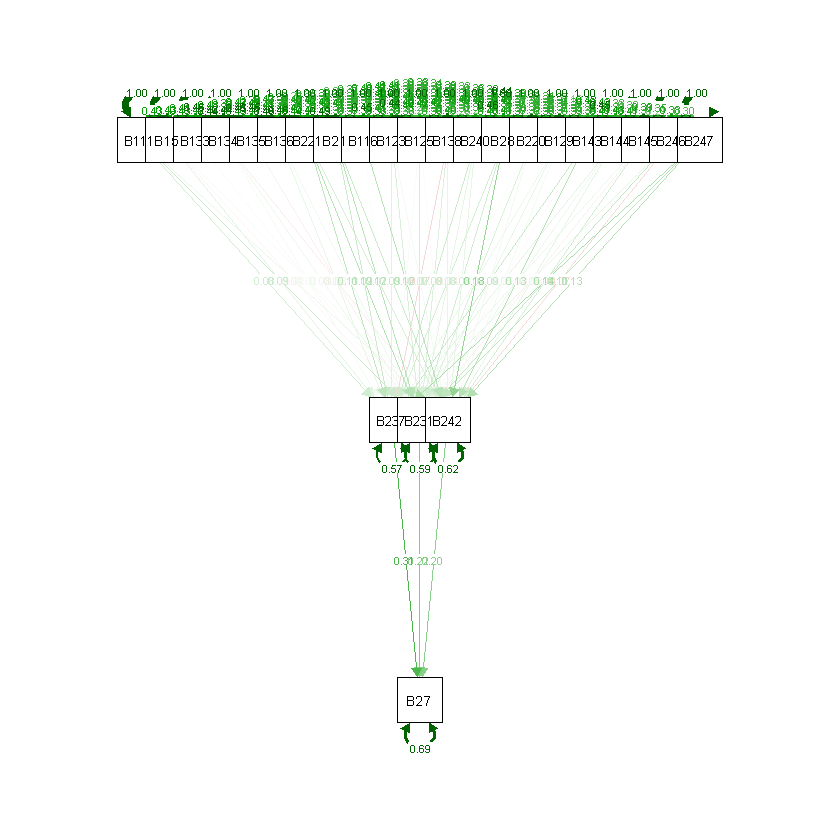

In [6]:
semPaths(fit1, 'std', layout = 'tree2') 

### 不同模型

In [17]:
model = 'B2r7c1 ~ B2r37c1 + B2r31c1 + B2r42c1 
B2r37c1 ~ B1r45c1 + B1r43c1 + B1r1c1 + B1r23c1 + B1r16c1 + B1r44c1 + B1r36c1 + B1r33c1 
B2r42c1 ~ B1r38c1 + B1r34c1 + B1r29c1 + B1r25c1 + B1r35c1 + B1r5c1 
B2r31c1 ~ B2r20c1 + B2r40c1 + B2r46c1 + B2r8c1 + B2r47c1 + B2r13c1 + B2r21c1
'

fit1 = cfa(model, data = data)
summary(fit1, fit.measures = TRUE, standardized = TRUE, rsquare = TRUE)

lavaan 0.6-3 ended normally after 31 iterations

  Optimization method                           NLMINB
  Number of free parameters                         28

  Number of observations                          1310

  Estimator                                         ML
  Model Fit Test Statistic                     877.074
  Degrees of freedom                                66
  P-value (Chi-square)                           0.000

Model test baseline model:

  Minimum Function Test Statistic             2841.676
  Degrees of freedom                                90
  P-value                                        0.000

User model versus baseline model:

  Comparative Fit Index (CFI)                    0.705
  Tucker-Lewis Index (TLI)                       0.598

Loglikelihood and Information Criteria:

  Loglikelihood user model (H0)              -2297.281
  Loglikelihood unrestricted model (H1)      -1858.744

  Number of free parameters                         28
  Akaike (AIC)  

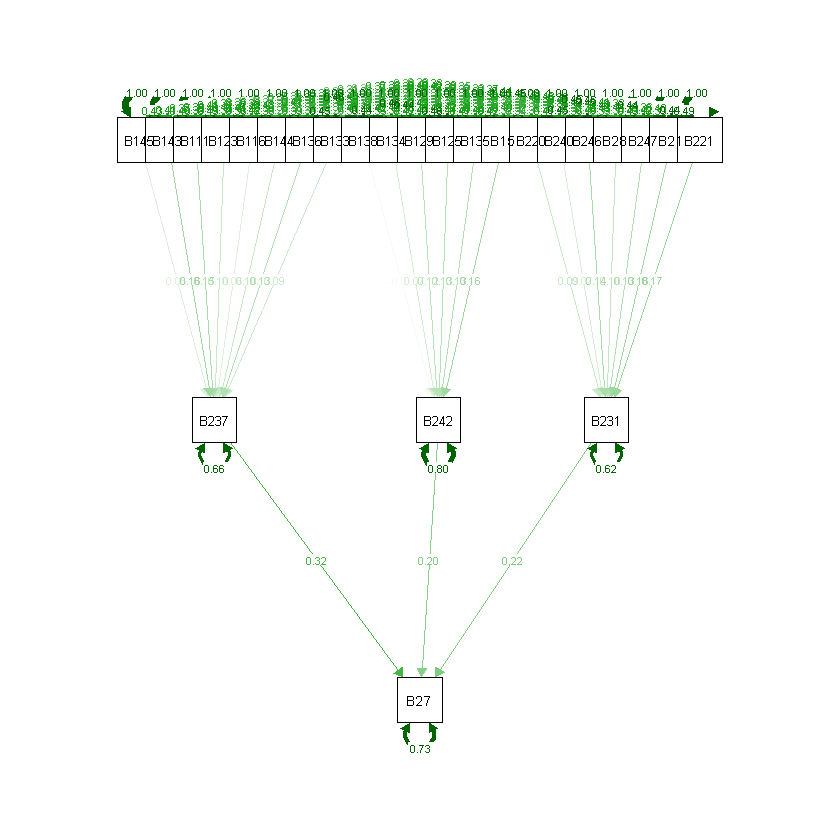

In [18]:
semPaths(fit1, 'std', layout = 'tree2') 

In [19]:
model = 'B2r7c1 ~ B2r37c1 + B2r31c1 + B2r42c1 
B2r37c1 ~ B1r33c1 + B1r34c1 + B1r35c1 + B1r5c1 + B1r36c1 + B1r38c1 + B2r40c1 + B2r47c1 
B2r31c1 ~ B1r1c1 + B2r21c1 + B2r13c1 + B1r23c1 + B1r25c1 + B2r20c1 + B1r29c1 + B2r46c1 
B2r42c1 ~ B1r16c1 + B2r8c1 + B1r43c1 + B1r44c1 + B1r45c1
'

fit1 = cfa(model, data = data)
summary(fit1, fit.measures = TRUE, standardized = TRUE, rsquare = TRUE)

lavaan 0.6-3 ended normally after 30 iterations

  Optimization method                           NLMINB
  Number of free parameters                         28

  Number of observations                          1310

  Estimator                                         ML
  Model Fit Test Statistic                     550.842
  Degrees of freedom                                66
  P-value (Chi-square)                           0.000

Model test baseline model:

  Minimum Function Test Statistic             2841.676
  Degrees of freedom                                90
  P-value                                        0.000

User model versus baseline model:

  Comparative Fit Index (CFI)                    0.824
  Tucker-Lewis Index (TLI)                       0.760

Loglikelihood and Information Criteria:

  Loglikelihood user model (H0)              -2134.165
  Loglikelihood unrestricted model (H1)      -1858.744

  Number of free parameters                         28
  Akaike (AIC)  

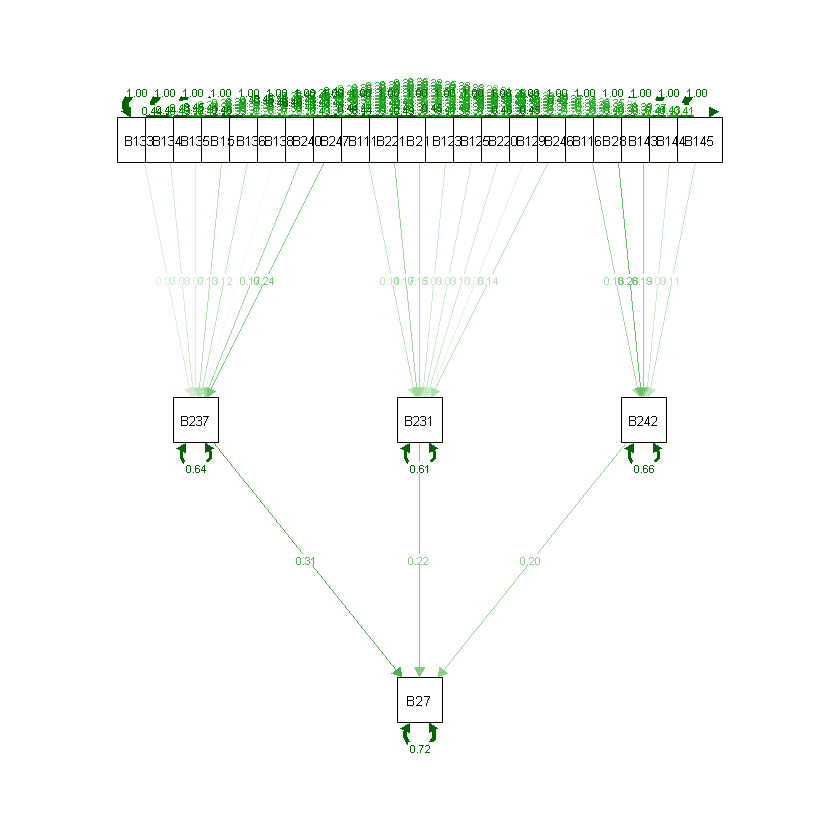

In [20]:
semPaths(fit1, 'std', layout = 'tree2') 

In [22]:
model = 'B2r7c1 ~ B2r37c1 + B2r31c1 + B2r42c1 
B2r37c1 ~ B1r5c1 + B1r33c1 + B1r36c1 + B1r23c1 + B2r40c1 + B2r47c1 
B2r31c1 ~ B1r1c1 + B1r34c1 + B2r21c1 + B2r13c1 + B1r25c1 + B1r38c1 + B2r20c1 + B1r29c1 + B2r46c1 
B2r42c1 ~ B1r35c1 + B1r16c1 + B2r8c1 + B1r43c1 + B1r44c1 + B1r45c1
'

fit1 = cfa(model, data = data)
summary(fit1, fit.measures = TRUE, standardized = TRUE, rsquare = TRUE)

lavaan 0.6-3 ended normally after 29 iterations

  Optimization method                           NLMINB
  Number of free parameters                         28

  Number of observations                          1310

  Estimator                                         ML
  Model Fit Test Statistic                     536.653
  Degrees of freedom                                66
  P-value (Chi-square)                           0.000

Model test baseline model:

  Minimum Function Test Statistic             2841.676
  Degrees of freedom                                90
  P-value                                        0.000

User model versus baseline model:

  Comparative Fit Index (CFI)                    0.829
  Tucker-Lewis Index (TLI)                       0.767

Loglikelihood and Information Criteria:

  Loglikelihood user model (H0)              -2127.070
  Loglikelihood unrestricted model (H1)      -1858.744

  Number of free parameters                         28
  Akaike (AIC)  

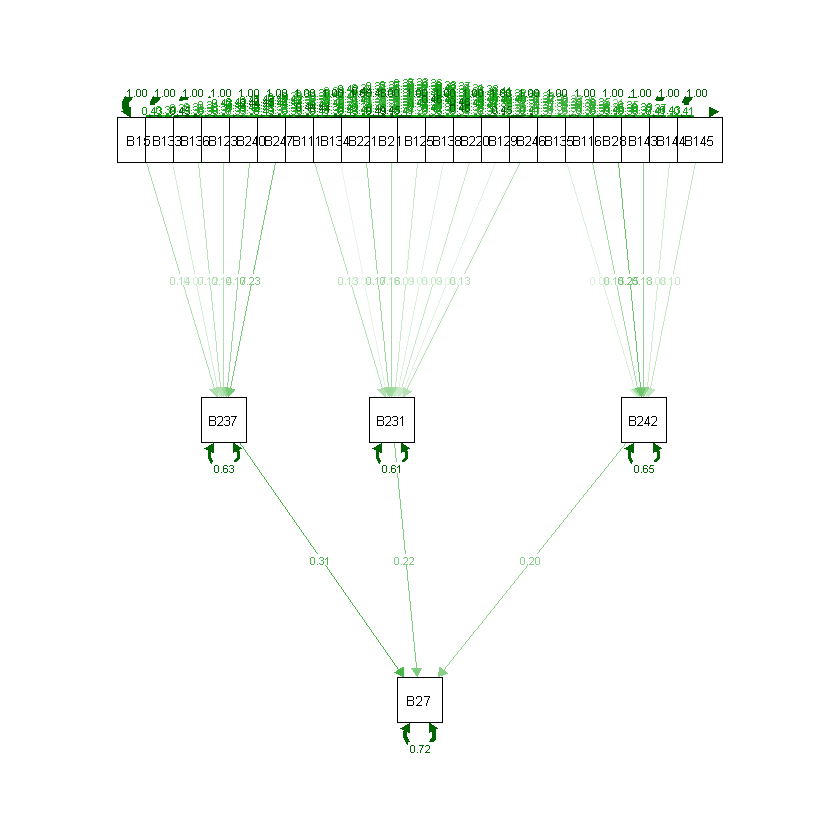

In [23]:
semPaths(fit1, 'std', layout = 'tree2') 

## 路径分析

In [18]:
model = 'B2r7c1 ~ B2r37c1 + B2r31c1 + B2r42c1 
B2r37c1 ~ B1r1c1 + B1r5c1 + B1r33c1 + B1r34c1 + B1r35c1 + B1r36c1 + B2r21c1 
B2r31c1 ~ B2r13c1 + B1r16c1 + B1r23c1 + B1r25c1 + B1r38c1 + B2r40c1 
B2r42c1 ~ B2r8c1 + B2r20c1 + B1r29c1 + B1r43c1 + B1r44c1 + B1r45c1 + B2r46c1 + B2r47c1 
B1r23c1 ~ B1r16c1
B2r13c1 ~ B1r23c1 
B2r21c1 ~ B1r1c1 + B1r34c1 + B1r5c1 + B1r35c1 
B1r34c1 ~ B1r33c1 
B1r35c1 ~ B1r33c1 
B2r8c1 ~ B1r29c1 + B1r43c1 + B1r44c1 
B1r43c1 ~ B1r45c1 
'

In [19]:
fit1 = cfa(model, data = data)
summary(fit1, fit.measures = TRUE, standardized = TRUE, rsquare = TRUE)

lavaan 0.6-3 ended normally after 43 iterations

  Optimization method                           NLMINB
  Number of free parameters                         47

  Number of observations                          1310

  Estimator                                         ML
  Model Fit Test Statistic                    3073.731
  Degrees of freedom                               173
  P-value (Chi-square)                           0.000

Model test baseline model:

  Minimum Function Test Statistic             7274.969
  Degrees of freedom                               209
  P-value                                        0.000

User model versus baseline model:

  Comparative Fit Index (CFI)                    0.589
  Tucker-Lewis Index (TLI)                       0.504

Loglikelihood and Information Criteria:

  Loglikelihood user model (H0)              -7123.658
  Loglikelihood unrestricted model (H1)      -5586.792

  Number of free parameters                         47
  Akaike (AIC)  

In [27]:
semPaths(fit1, 'std', layout = 'tree2') 

ERROR: Error in png(tf, width, height, "in", pointsize, bg, res, antialias = antialias): 无法启动png()装置


plot without title

In [25]:
png("bla.png");plot(1:10);dev.off()

png 
  2

In [28]:
fit2 = cfa(model, data = data)
summary(fit2) 

lavaan 0.6-2 ended normally after 30 iterations

  Optimization method                           NLMINB
  Number of free parameters                         28

  Number of observations                          1310

  Estimator                                         ML
  Model Fit Test Statistic                     669.004
  Degrees of freedom                                66
  P-value (Chi-square)                           0.000

Parameter Estimates:

  Information                                 Expected
  Information saturated (h1) model          Structured
  Standard Errors                             Standard

Regressions:
                   Estimate  Std.Err  z-value  P(>|z|)
  B2r7c1 ~                                            
    B2r37c1           0.306    0.024   12.653    0.000
    B2r31c1           0.202    0.023    8.850    0.000
    B2r42c1           0.206    0.025    8.222    0.000
  B2r37c1 ~                                           
    B1r1c1            0.172    0

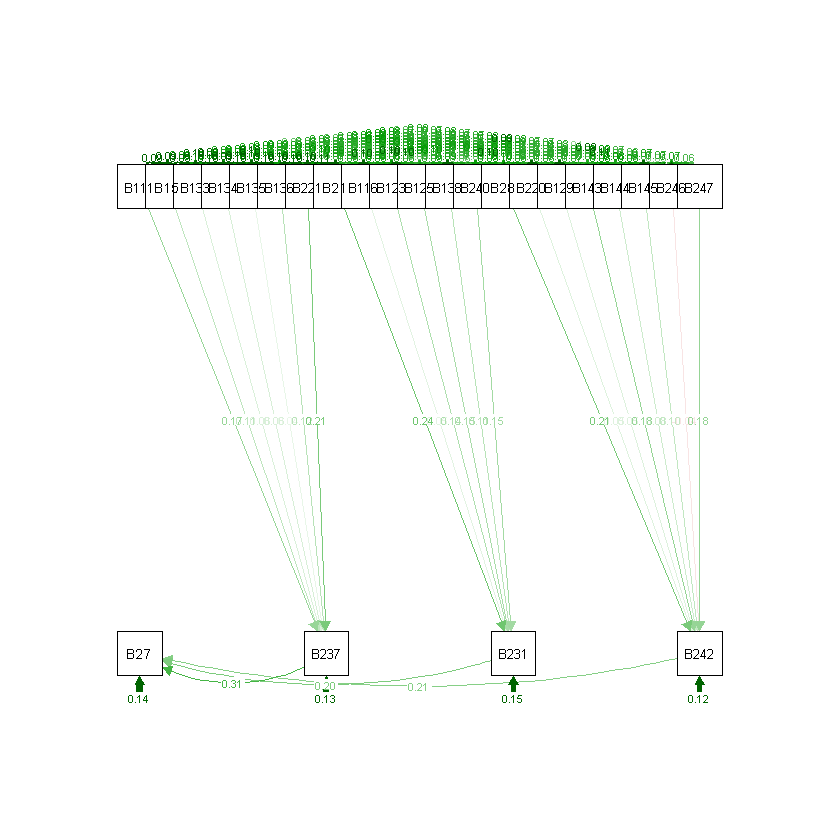

In [29]:
semPaths(fit2, 'std', 'est', curveAdjacent = TRUE, style = "lisrel")

In [32]:
fit <- sem(model, data=data)
summary(fit)

lavaan 0.6-2 ended normally after 30 iterations

  Optimization method                           NLMINB
  Number of free parameters                         28

  Number of observations                          1310

  Estimator                                         ML
  Model Fit Test Statistic                     669.004
  Degrees of freedom                                66
  P-value (Chi-square)                           0.000

Parameter Estimates:

  Information                                 Expected
  Information saturated (h1) model          Structured
  Standard Errors                             Standard

Regressions:
                   Estimate  Std.Err  z-value  P(>|z|)
  B2r7c1 ~                                            
    B2r37c1           0.306    0.024   12.653    0.000
    B2r31c1           0.202    0.023    8.850    0.000
    B2r42c1           0.206    0.025    8.222    0.000
  B2r37c1 ~                                           
    B1r1c1            0.172    0

# 201903

## 导入数据

In [9]:
file_folder <- "D:/XH/Python_Project/notebook/new_proj/201903"
# getwd()
setwd(file_folder)

data <- read_excel('tengxun.xlsx')
# data <- read_excel('data_combined.xlsx')
print(dim(data))
head(data, n = 5) 

[1] 1656   61


C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C52,C53,C54,C55,C56,C57,C58,D1,D2,D3
5,4,3,2,2,4,3,4,4,3,...,3,5,5,4,4,3,4,4,5,5
4,3,3,3,4,3,4,3,3,4,...,4,4,4,4,4,3,4,4,4,4
4,4,4,2,4,5,5,4,5,4,...,4,5,5,4,5,5,5,4,4,4
4,4,4,3,4,3,3,4,4,4,...,3,3,3,4,4,4,4,3,3,4
4,4,4,3,4,3,3,4,3,3,...,3,4,4,4,4,3,4,4,5,4


## 描述性统计分析

In [30]:
summary(data)

# options(scipen = 200)

# if(!require(pastecs)){install.packages("pastecs")}
# library(pastecs)
# stat.desc(data,basic=TRUE, desc=FALSE, norm=TRUE, p=0.95) 

       E1              E2              E3              E4              E5      
 Min.   :1.000   Min.   :1.000   Min.   :1.000   Min.   :1.000   Min.   :1.00  
 1st Qu.:4.000   1st Qu.:3.500   1st Qu.:3.000   1st Qu.:4.000   1st Qu.:3.50  
 Median :4.000   Median :4.000   Median :4.000   Median :4.000   Median :4.00  
 Mean   :4.146   Mean   :3.921   Mean   :3.942   Mean   :4.037   Mean   :4.01  
 3rd Qu.:5.000   3rd Qu.:4.333   3rd Qu.:5.000   3rd Qu.:5.000   3rd Qu.:4.50  
 Max.   :5.000   Max.   :5.000   Max.   :5.000   Max.   :5.000   Max.   :5.00  
       E6              E7              E8              E9             E10      
 Min.   :1.000   Min.   :1.000   Min.   :1.000   Min.   :1.000   Min.   :1.00  
 1st Qu.:4.000   1st Qu.:3.000   1st Qu.:3.500   1st Qu.:3.429   1st Qu.:3.00  
 Median :4.000   Median :4.000   Median :4.000   Median :3.857   Median :4.00  
 Mean   :4.153   Mean   :4.019   Mean   :4.102   Mean   :3.830   Mean   :3.83  
 3rd Qu.:5.000   3rd Qu.:5.000   3rd Qu.

## 相关矩阵

In [31]:
if(!require(xlsx)){install.packages("xlsx")}

library(xlsx) #load the package
write.xlsx(x = cor_matr, file = "cor.xlsx",
        sheetName = "TestSheet", row.names = TRUE)

In [ ]:
print(mode(cor_matr))
cor_matr = data.frame(cor_matr)
print(mode(cor_matr))
cor_matr

In [32]:
if(!require(caret)){install.packages("caret")}
library(caret)
cor_matr = cor(data)
print(mode(cor_matr))
cor_matr

[1] "numeric"


,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,E26,E27,E28,E29,E30,E31,E32,D1,D2,D3
E1,1.0000000,0.4378247,0.2777784,0.3662899,0.3423167,0.3731715,0.2613640,0.3144545,0.3118134,0.2200815,...,0.2232130,0.3072871,0.2893436,0.2280322,0.2227160,0.2020105,0.2276934,0.2611176,0.2932929,0.2596458
E2,0.4378247,1.0000000,0.4914139,0.4487345,0.5295613,0.4137540,0.3737713,0.4067616,0.5171421,0.4058307,...,0.3501188,0.4622507,0.3845680,0.3397766,0.3632433,0.3348670,0.3440861,0.3394176,0.3105965,0.3063478
E3,0.2777784,0.4914139,1.0000000,0.3056772,0.3635121,0.3011548,0.2670427,0.2746161,0.3499902,0.2824887,...,0.2518171,0.3015037,0.2463708,0.2497269,0.2857953,0.2136885,0.2151031,0.2257276,0.2154286,0.1924497
E4,0.3662899,0.4487345,0.3056772,1.0000000,0.4146197,0.3346038,0.2793368,0.2820657,0.3352419,0.2200794,...,0.2283727,0.3085828,0.2728347,0.2401352,0.1979794,0.2477594,0.2362591,0.2756096,0.2929223,0.2303021
E5,0.3423167,0.5295613,0.3635121,0.4146197,1.0000000,0.3902814,0.2945199,0.3445179,0.4220524,0.2974614,...,0.3014414,0.3612262,0.3135489,0.2969843,0.2405200,0.2702344,0.3016126,0.2851080,0.2861408,0.2886387
E6,0.3731715,0.4137540,0.3011548,0.3346038,0.3902814,1.0000000,0.2778538,0.3220606,0.2599907,0.1957790,...,0.1967158,0.2697144,0.2370559,0.2336606,0.1937361,0.2048334,0.2522525,0.2463890,0.2683276,0.2801696
E7,0.2613640,0.3737713,0.2670427,0.2793368,0.2945199,0.2778538,1.0000000,0.4408888,0.4500451,0.3334249,...,0.2746952,0.3671278,0.3288641,0.3179782,0.2876457,0.3232329,0.2938511,0.3262335,0.3114982,0.3178815
E8,0.3144545,0.4067616,0.2746161,0.2820657,0.3445179,0.3220606,0.4408888,1.0000000,0.4289165,0.3178587,...,0.2960722,0.4231343,0.3521654,0.3638448,0.3106951,0.3282861,0.3336993,0.4082495,0.4106233,0.4090347
E9,0.3118134,0.5171421,0.3499902,0.3352419,0.4220524,0.2599907,0.4500451,0.4289165,1.0000000,0.5666445,...,0.4504576,0.4877508,0.4006666,0.4229764,0.4176692,0.4878869,0.4090864,0.3510997,0.3344526,0.3160817
E10,0.2200815,0.4058307,0.2824887,0.2200794,0.2974614,0.1957790,0.3334249,0.3178587,0.5666445,1.0000000,...,0.3033100,0.3568934,0.3000231,0.2867631,0.2967389,0.3633575,0.3026252,0.2763056,0.2147169,0.2292553


In [33]:
#调用findCorrelation函数找到关联度超过0.75的属性
highly_correlations = findCorrelation(cor_matr,cutoff = 0.75)
highly_correlations

integer(0)

In [34]:
if(!require(Hmisc)){install.packages("Hmisc")}
library(Hmisc)
# 输出说明：
# r ：第一个矩阵为相关性矩阵
# n :  处理数据的总记录数（行数）
# P :  显著性水平矩阵（越小说明越显著）
rnp = rcorr(as.matrix(data))
rnp

Loading required package: Hmisc
Loading required package: survival

Attaching package: 'survival'

The following object is masked from 'package:caret':

    cluster

Loading required package: Formula

Attaching package: 'Hmisc'

The following object is masked from 'package:psych':

    describe

The following objects are masked from 'package:base':

    format.pval, units



      E1   E2   E3   E4   E5   E6   E7   E8   E9  E10  E11  E12  E13  E14  E15
E1  1.00 0.44 0.28 0.37 0.34 0.37 0.26 0.31 0.31 0.22 0.25 0.34 0.32 0.28 0.29
E2  0.44 1.00 0.49 0.45 0.53 0.41 0.37 0.41 0.52 0.41 0.46 0.37 0.34 0.45 0.34
E3  0.28 0.49 1.00 0.31 0.36 0.30 0.27 0.27 0.35 0.28 0.32 0.22 0.19 0.28 0.24
E4  0.37 0.45 0.31 1.00 0.41 0.33 0.28 0.28 0.34 0.22 0.28 0.30 0.27 0.29 0.27
E5  0.34 0.53 0.36 0.41 1.00 0.39 0.29 0.34 0.42 0.30 0.36 0.33 0.29 0.35 0.27
E6  0.37 0.41 0.30 0.33 0.39 1.00 0.28 0.32 0.26 0.20 0.21 0.31 0.31 0.31 0.28
E7  0.26 0.37 0.27 0.28 0.29 0.28 1.00 0.44 0.45 0.33 0.39 0.38 0.37 0.43 0.36
E8  0.31 0.41 0.27 0.28 0.34 0.32 0.44 1.00 0.43 0.32 0.31 0.58 0.46 0.44 0.46
E9  0.31 0.52 0.35 0.34 0.42 0.26 0.45 0.43 1.00 0.57 0.75 0.35 0.31 0.54 0.38
E10 0.22 0.41 0.28 0.22 0.30 0.20 0.33 0.32 0.57 1.00 0.52 0.25 0.23 0.38 0.26
E11 0.25 0.46 0.32 0.28 0.36 0.21 0.39 0.31 0.75 0.52 1.00 0.24 0.20 0.43 0.29
E12 0.34 0.37 0.22 0.30 0.33 0.31 0.38 0.58 0.35 0.2

In [35]:
mode(rnp)

[1] "list"

In [ ]:
library(corrplot)
corrplot(cor_matr, type="upper", order="hclust", tl.col="black", tl.srt=45)

In [36]:
if(!require(PerformanceAnalytics)){install.packages("PerformanceAnalytics")}
library(PerformanceAnalytics)
chart.Correlation(data,histogram = TRUE,pch=19)

Loading required package: PerformanceAnalytics
Loading required package: xts
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Attaching package: 'PerformanceAnalytics'

The following object is masked from 'package:graphics':

    legend



ERROR: Error in png(tf, width, height, "in", pointsize, bg, res, antialias = antialias): 无法启动png()装置


Plot with title ""

## 变量重要性

## 多重线性回归

In [37]:
linear_model_1 = 'D1 ~ E1 + E2 + E3 + E4 + E5 + E6 + E7 + E8 + E9 + E10 + E11 + E12 + E13 + E14 + E15 + E16 + E17 + E18 + E19 + E20 + E21 + E22 + E23 + E24 + E25 + E26 + E27 + E28 + E29 + E30 + E31 + E32'
linear_fit_1 <- lm(linear_model_1, data = data)
# print(coef(linear_fit_1))
# print('---------------------------------------------')
summary(linear_fit_1)


Call:
lm(formula = linear_model_1, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.74321 -0.41108  0.02377  0.45241  2.09457 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.205053   0.142573   1.438 0.150560    
E1           0.009521   0.024620   0.387 0.699018    
E2          -0.014594   0.041550  -0.351 0.725462    
E3          -0.010342   0.021563  -0.480 0.631568    
E4           0.051662   0.023900   2.162 0.030795 *  
E5           0.004837   0.029215   0.166 0.868531    
E6           0.001074   0.023639   0.045 0.963773    
E7           0.027909   0.024029   1.162 0.245609    
E8           0.090845   0.034288   2.649 0.008140 ** 
E9          -0.040261   0.046402  -0.868 0.385714    
E10          0.022646   0.021740   1.042 0.297720    
E11         -0.033210   0.034394  -0.966 0.334395    
E12          0.020857   0.032467   0.642 0.520701    
E13          0.047208   0.025909   1.822 0.068628 .  
E14         -0.043821 

In [39]:
linear_model_2 = 'D2 ~ E1 + E2 + E3 + E4 + E5 + E6 + E7 + E8 + E9 + E10 + E11 + E12 + E13 + E14 + E15 + E16 + E17 + E18 + E19 + E20 + E21 + E22 + E23 + E24 + E25 + E26 + E27 + E28 + E29 + E30 + E31 + E32'
linear_fit_2 <- lm(linear_model_2, data = data)
summary(linear_fit_2)


Call:
lm(formula = linear_model_2, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.76130 -0.44105  0.03511  0.47332  2.24953 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.319120   0.146069   2.185 0.029052 *  
E1           0.054015   0.025223   2.141 0.032385 *  
E2          -0.092921   0.042569  -2.183 0.029193 *  
E3          -0.002860   0.022092  -0.129 0.897013    
E4           0.070371   0.024486   2.874 0.004107 ** 
E5           0.012610   0.029931   0.421 0.673591    
E6           0.026204   0.024219   1.082 0.279419    
E7           0.019418   0.024618   0.789 0.430373    
E8           0.092039   0.035129   2.620 0.008875 ** 
E9           0.010583   0.047540   0.223 0.823866    
E10         -0.044467   0.022273  -1.996 0.046051 *  
E11         -0.080701   0.035238  -2.290 0.022138 *  
E12          0.082927   0.033263   2.493 0.012764 *  
E13          0.102601   0.026545   3.865 0.000115 ***
E14         -0.017877 

In [40]:
linear_model_3 = 'D3 ~ E1 + E2 + E3 + E4 + E5 + E6 + E7 + E8 + E9 + E10 + E11 + E12 + E13 + E14 + E15 + E16 + E17 + E18 + E19 + E20 + E21 + E22 + E23 + E24 + E25 + E26 + E27 + E28 + E29 + E30 + E31 + E32'
linear_fit_3 <- lm(linear_model_3, data = data)
summary(linear_fit_3)


Call:
lm(formula = linear_model_3, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.72890 -0.41115  0.02581  0.46059  2.38522 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.372072   0.144755   2.570 0.010248 *  
E1           0.015734   0.024996   0.629 0.529137    
E2          -0.057696   0.042187  -1.368 0.171612    
E3          -0.026352   0.021893  -1.204 0.228897    
E4          -0.017412   0.024266  -0.718 0.473136    
E5           0.043726   0.029662   1.474 0.140637    
E6           0.059786   0.024001   2.491 0.012839 *  
E7           0.030849   0.024397   1.264 0.206243    
E8           0.069686   0.034813   2.002 0.045482 *  
E9          -0.041925   0.047112  -0.890 0.373654    
E10         -0.017355   0.022073  -0.786 0.431822    
E11         -0.120833   0.034921  -3.460 0.000554 ***
E12          0.094494   0.032964   2.867 0.004203 ** 
E13          0.041303   0.026306   1.570 0.116584    
E14         -0.026727 

## 因子分析

In [23]:
if(!require(psych)){install.packages("psych")}
library(psych)

## 分层回归

## 路径分析

In [5]:
model_1 = 'D1 ~  E4 +  E8 +  E16 +  E18 +  E20 +  E27 +  E28 +  E29 +  E30 +  E31 +  E32 
D2 ~  E1 +  E2 +  E4 +  E8 +  E10 +  E11 +  E12 +  E13 +  E25 +  E26 +  E27 +  E28 +  E29 +  E31 +  E32 
D3 ~  E6 +  E8 +  E11 +  E12 +  E15 +  E25 +  E27 +  E28 +  E29 +  E31 +  E32'

fit_1 = cfa(model_1, data = data)
summary(fit_1, fit.measures = TRUE, standardized = TRUE, rsquare = TRUE)

lavaan 0.6-3 ended normally after 26 iterations

  Optimization method                           NLMINB
  Number of free parameters                         43

  Number of observations                          1656

  Estimator                                         ML
  Model Fit Test Statistic                      44.831
  Degrees of freedom                                26
  P-value (Chi-square)                           0.012

Model test baseline model:

  Minimum Function Test Statistic             2428.753
  Degrees of freedom                                66
  P-value                                        0.000

User model versus baseline model:

  Comparative Fit Index (CFI)                    0.992
  Tucker-Lewis Index (TLI)                       0.980

Loglikelihood and Information Criteria:

  Loglikelihood user model (H0)              -4979.575
  Loglikelihood unrestricted model (H1)      -4957.160

  Number of free parameters                         43
  Akaike (AIC)  

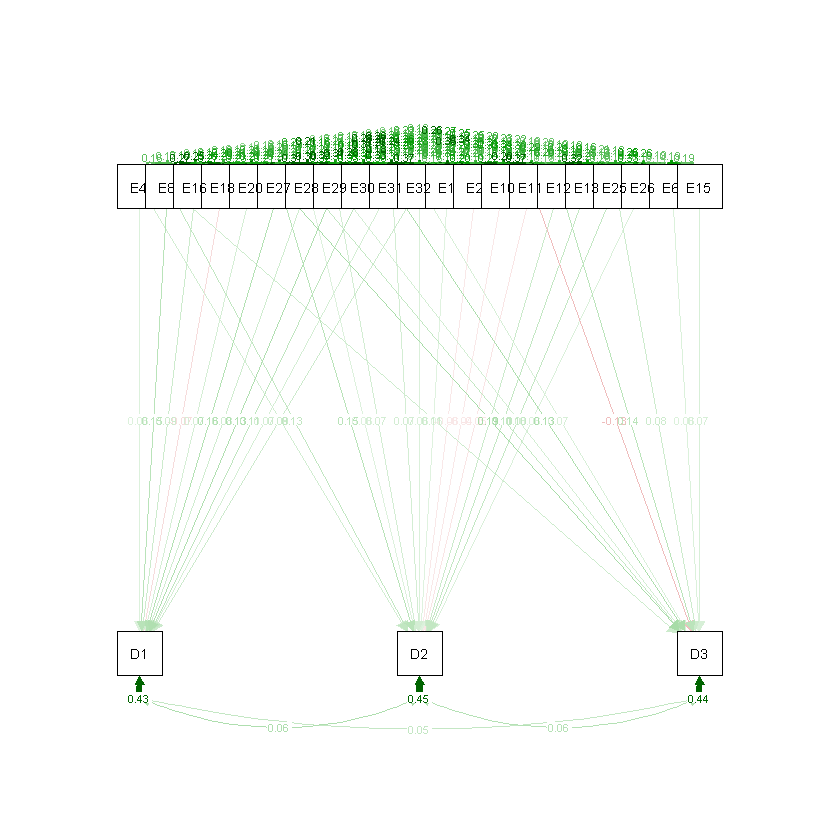

In [7]:
semPaths(fit_1, 'std', 'est', curveAdjacent = TRUE, style = "lisrel")

In [10]:
model_2 = 'D1 ~  C6 +  C14 +  C15 +  C30 +  C32 +  C34 +  C35 +  C51 +  C52 +  C53 +  C54 +  C55 +  C56 +  C57 +  C58 
D2 ~  C1 +  C2 +  C3 +  C4 +  C10 +  C11 +  C12 +  C6 +  C14 +  C15 +  C22 +  C23 +  C24 +  C25 +  C26 +  C42 +  C27 +  C49 +  C50 +  C51 +  C52 +  C53 +  C54 +  C55 +  C57 +  C58 
D3 ~  C9 +  C14 +  C15 +  C23 +  C24 +  C25 +  C26 +  C42 +  C29 +  C49 +  C51 +  C52 +  C53 +  C54 +  C55 +  C57 +  C58'

fit_2 = cfa(model_2, data = data)
summary(fit_2, fit.measures = TRUE, standardized = TRUE, rsquare = TRUE)

lavaan 0.6-3 ended normally after 26 iterations

  Optimization method                           NLMINB
  Number of free parameters                         64

  Number of observations                          1656

  Estimator                                         ML
  Model Fit Test Statistic                      64.740
  Degrees of freedom                                41
  P-value (Chi-square)                           0.010

Model test baseline model:

  Minimum Function Test Statistic             2516.146
  Degrees of freedom                               102
  P-value                                        0.000

User model versus baseline model:

  Comparative Fit Index (CFI)                    0.990
  Tucker-Lewis Index (TLI)                       0.976

Loglikelihood and Information Criteria:

  Loglikelihood user model (H0)              -4945.833
  Loglikelihood unrestricted model (H1)      -4913.463

  Number of free parameters                         64
  Akaike (AIC)  

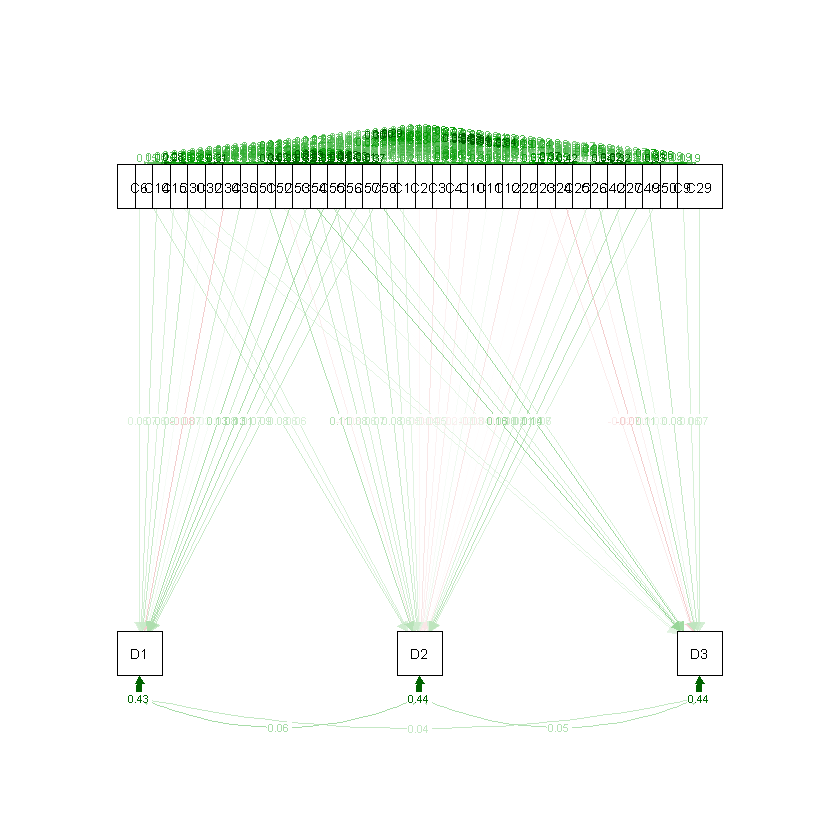

In [11]:
semPaths(fit_2, 'std', 'est', curveAdjacent = TRUE, style = "lisrel")

## 结构方程模型